<a href="https://colab.research.google.com/github/melinnicri/EjercicioML/blob/main/MLmineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tratamiento de la nueva Dataframe, sobre eficiencias de camión, pala, eficiencia por tonelaje por pala y eficiencia de distancias, para camiones y palas durante el tiempo que se realizan estas actividades.

In [ ]:
# Importar librerías
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# para eliminar warnings en python
import warnings
warnings.simplefilter('ignore')

In [ ]:
# Abrir archivo
# Lee el archivo CSV
archivo_csv = '/content/drive/MyDrive/camiones_eficiencia.csv'

In [ ]:
# Dataframe
df = pd.read_csv(archivo_csv)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356708 entries, 0 to 356707
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   date                  356708 non-null  object 
 1   truck                 356708 non-null  object 
 2   loader                356708 non-null  object 
 3   eficiencia_camion     356708 non-null  float64
 4   eficiencia_pala       356708 non-null  float64
 5   tonelaje_por_paladas  356708 non-null  float64
 6   eficiencia_distancia  356708 non-null  float64
dtypes: float64(4), object(3)
memory usage: 19.1+ MB


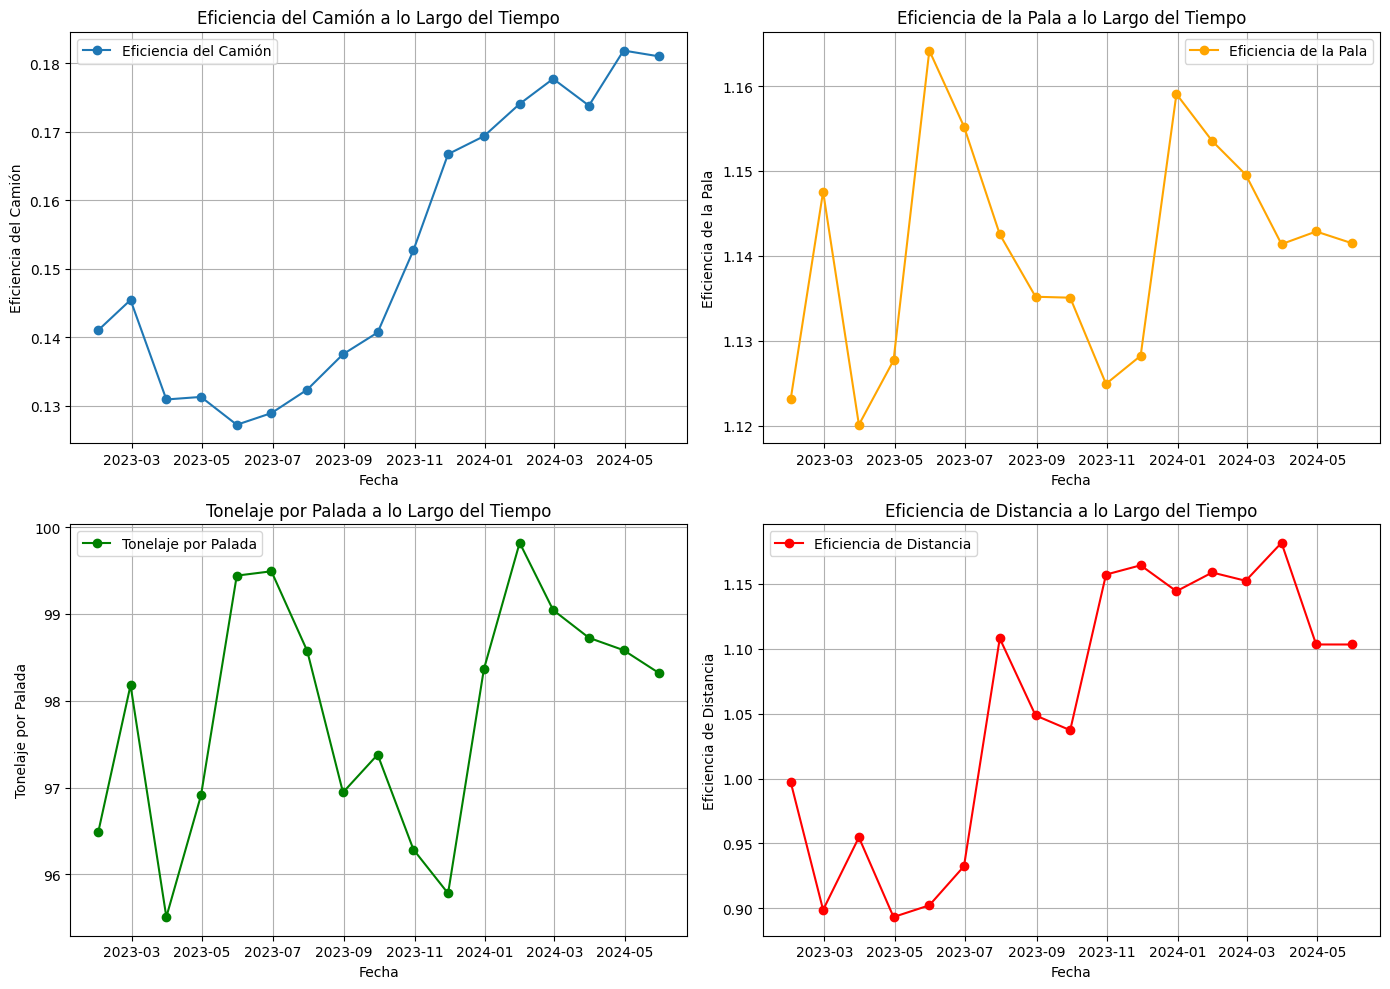

In [ ]:
# Graficar datos a lo largo del tiempo
# Date en formato de fecha
df['date'] = pd.to_datetime(df['date'])

# Crear un DataFrame con las columnas seleccionadas
df_seleccionado = df[['date', 'truck', 'loader', 'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia']]

# Establecer 'date' como el índice del DataFrame
df_seleccionado.set_index('date', inplace=True)

# Crear gráficos de las métricas a lo largo del tiempo
plt.figure(figsize=(14, 10))

# Gráfico de Eficiencia del Camión
plt.subplot(2, 2, 1)
plt.plot(df_seleccionado['eficiencia_camion'].resample('M').mean(), marker='o', label='Eficiencia del Camión')
plt.title('Eficiencia del Camión a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Eficiencia del Camión')
plt.legend()
plt.grid(True)

# Gráfico de Eficiencia de la Pala
plt.subplot(2, 2, 2)
plt.plot(df_seleccionado['eficiencia_pala'].resample('M').mean(), marker='o', color='orange', label='Eficiencia de la Pala')
plt.title('Eficiencia de la Pala a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Eficiencia de la Pala')
plt.legend()
plt.grid(True)

# Gráfico de Tonelaje por Palada
plt.subplot(2, 2, 3)
plt.plot(df_seleccionado['tonelaje_por_paladas'].resample('M').mean(), marker='o', color='green', label='Tonelaje por Palada')
plt.title('Tonelaje por Palada a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Tonelaje por Palada')
plt.legend()
plt.grid(True)

# Gráfico de Eficiencia de Distancia
plt.subplot(2, 2, 4)
plt.plot(df_seleccionado['eficiencia_distancia'].resample('M').mean(), marker='o', color='red', label='Eficiencia de Distancia')
plt.title('Eficiencia de Distancia a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Eficiencia de Distancia')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


                      eficiencia_camion  eficiencia_pala  \
eficiencia_camion              1.000000         0.005791   
eficiencia_pala                0.005791         1.000000   
tonelaje_por_paladas           0.020797         0.158310   
eficiencia_distancia          -0.067893         0.011406   

                      tonelaje_por_paladas  eficiencia_distancia  
eficiencia_camion                 0.020797             -0.067893  
eficiencia_pala                   0.158310              0.011406  
tonelaje_por_paladas              1.000000              0.006519  
eficiencia_distancia              0.006519              1.000000  


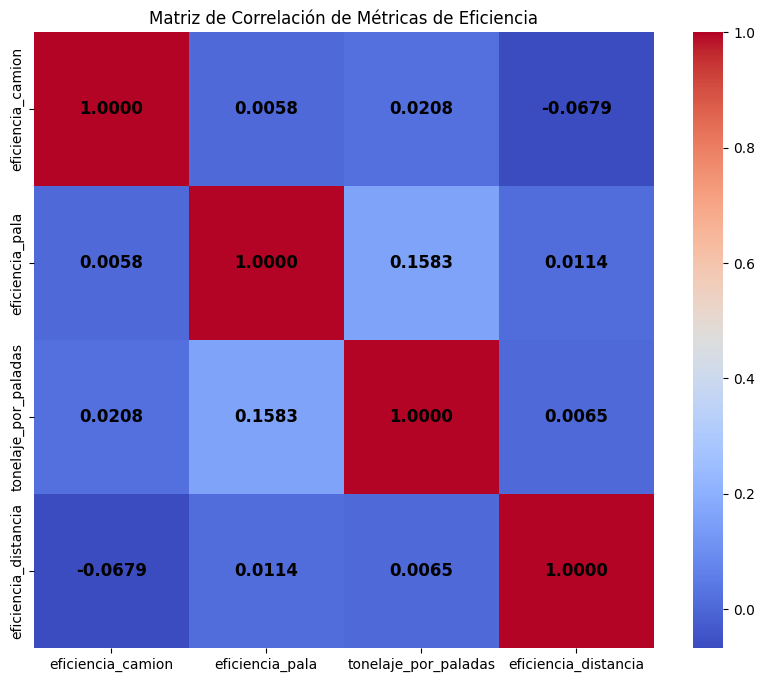

In [ ]:
# Calcular la matriz de correlación de las métricas de interés
variables_interes = ['eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia']
matriz_correlacion = df_seleccionado[variables_interes].corr()

# Mostrar la matriz de correlación
print(matriz_correlacion)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.4f', annot_kws={"size": 12, "weight": "bold", "color": "black"})
plt.title('Matriz de Correlación de Métricas de Eficiencia')
plt.show()


Esta nueva matriz de correlación da información sobre cómo están relacionadas entre sí las diferentes métricas de eficiencia que se ha calculado.

### Interpretación de la Matriz de Correlación

1. **Eficiencia del Camión**:
    - **Con Eficiencia de la Pala (0.005791)**: Hay una correlación muy débil y positiva entre la eficiencia del camión y la eficiencia de la pala. Esto sugiere que no hay una relación significativa entre estas dos métricas.
    - **Con Tonelaje por Palada (0.020797)**: También hay una correlación muy débil y positiva con el tonelaje por palada, indicando nuevamente una relación insignificante.
    - **Con Eficiencia de Distancia (-0.067893)**: La correlación es negativa y muy débil, indicando una relación muy pequeña y negativa entre la eficiencia del camión y la eficiencia de distancia.

2. **Eficiencia de la Pala**:
    - **Con Tonelaje por Palada (0.158310)**: Hay una correlación positiva débil entre la eficiencia de la pala y el tonelaje por palada. Esto sugiere que a medida que aumenta el tonelaje por palada, la eficiencia de la pala también tiende a aumentar, aunque esta relación es débil.
    - **Con Eficiencia de Distancia (0.011406)**: Hay una correlación muy débil y positiva, lo que indica prácticamente ninguna relación significativa entre estas métricas.

3. **Tonelaje por Palada**:
    - **Con Eficiencia de Distancia (0.006519)**: La correlación es extremadamente débil y positiva, indicando casi ninguna relación entre el tonelaje por palada y la eficiencia de distancia.

4. **Eficiencia de Distancia**:
    - Como se mencionó anteriormente, todas las correlaciones con la eficiencia de distancia son muy débiles, indicando poca o ninguna relación significativa con las otras métricas.

### Conclusiones Generales

- **Correlaciones Muy Débiles**: Las correlaciones son en su mayoría muy débiles, lo que sugiere que las métricas no están fuertemente relacionadas entre sí. Esto podría indicar que cada métrica captura diferentes aspectos de la eficiencia operativa y no están directamente influidas por las otras métricas.
- **Relación Débil**: La única correlación que muestra una relación débil es entre la eficiencia de la pala y el tonelaje por palada, lo que podría indicar que mejorar el tonelaje por palada puede tener un pequeño impacto positivo en la eficiencia de la pala.

### Como la correlación es débil, se aplicará PCA por separado, para camiones y para palas ###

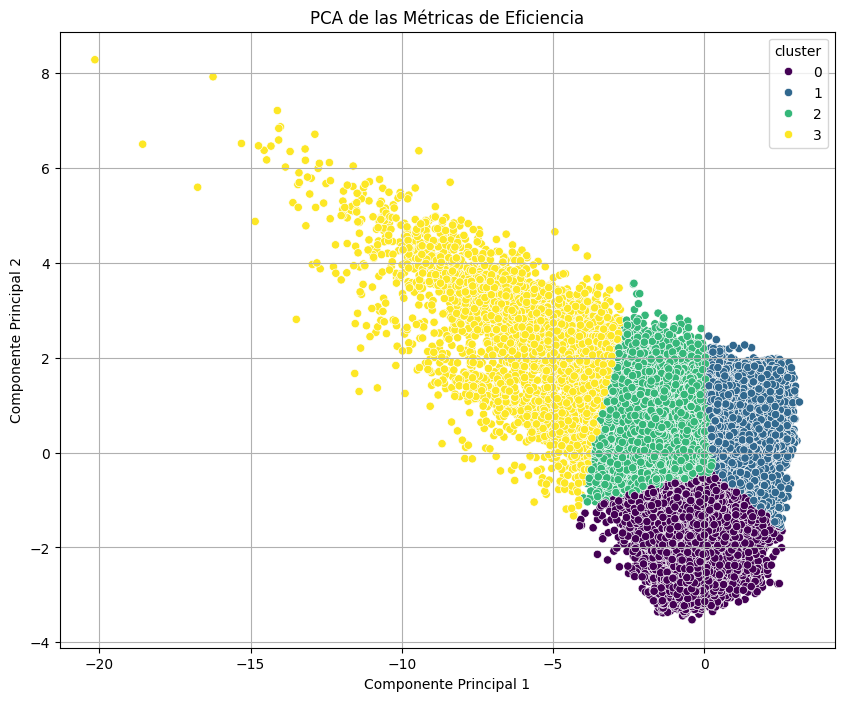

                                 date      truck    loader  eficiencia_camion  \
cluster                                                                         
0       2023-09-16 13:01:58.007696384  23.789563  1.581884           0.150339   
1       2023-11-03 19:19:15.869872896  23.464639  1.718293           0.139137   
2       2023-08-27 08:40:36.709982720  23.394221  1.791793           0.118032   
3       2023-12-03 09:11:45.128356352  23.291708  1.158139           0.217199   

         eficiencia_pala  tonelaje_por_paladas  eficiencia_distancia  
cluster                                                               
0               1.056925             79.063127              0.990484  
1               1.175720             99.073852              7.377063  
2               1.169723            104.649197              1.008742  
3               1.171333            104.381247              0.956280  


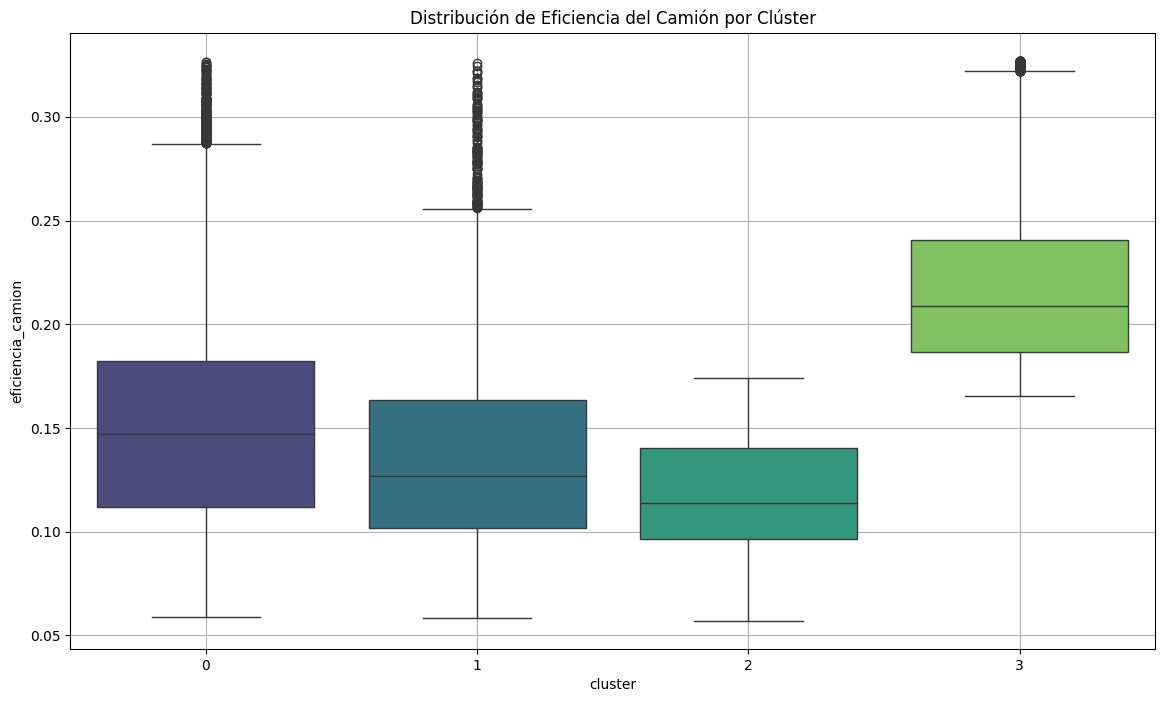

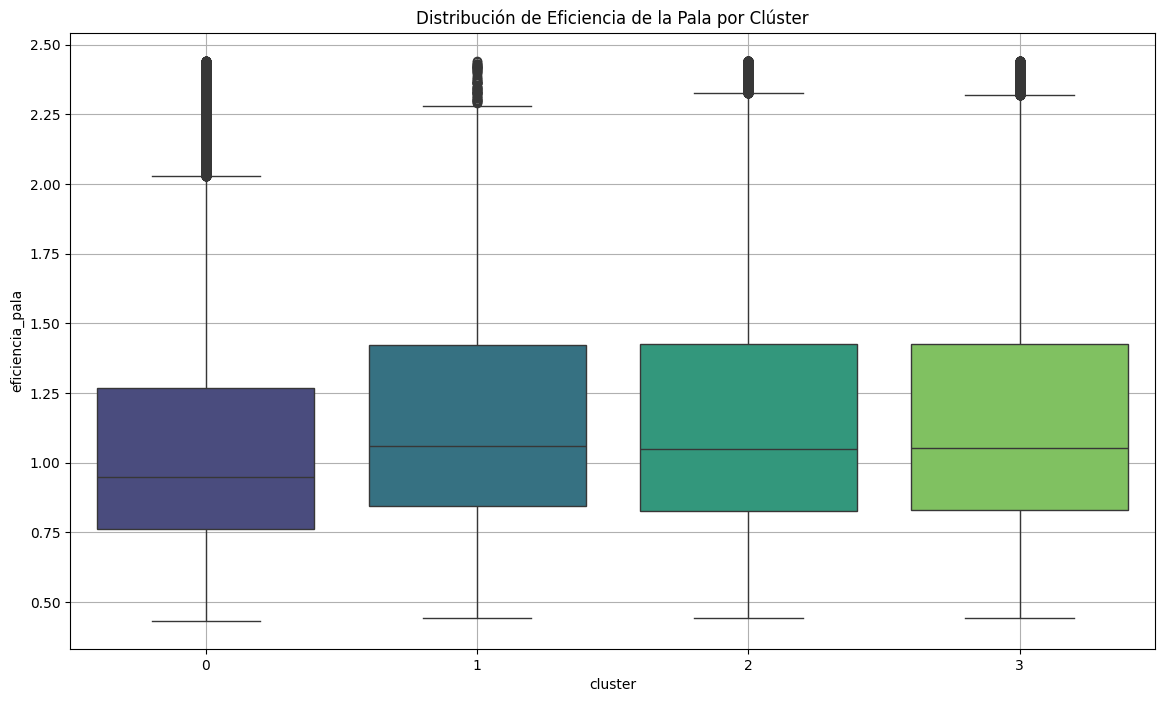

In [ ]:
# Columnas seleccionadas
df_seleccionado = df[['date', 'truck', 'loader', 'eficiencia_camion', 'eficiencia_pala', 'tonelaje_por_paladas', 'eficiencia_distancia']]

# Convertir las variables categóricas en códigos numéricos
df_seleccionado['truck'] = df_seleccionado['truck'].astype('category').cat.codes
df_seleccionado['loader'] = df_seleccionado['loader'].astype('category').cat.codes

# Seleccionar las variables independientes
X = df_seleccionado[['eficiencia_camion', 'tonelaje_por_paladas', 'eficiencia_distancia']]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Aplicar K-Means en los componentes principales
kmeans = KMeans(n_clusters=4, random_state=0)
df_pca['cluster'] = kmeans.fit_predict(pca_result)

# Asegúrate de añadir la columna 'cluster' al DataFrame original
df_seleccionado['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar los componentes principales con los clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='viridis')
plt.title('PCA de las Métricas de Eficiencia')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Calcular las medias dentro de cada clúster
cluster_means = df_seleccionado.groupby('cluster').mean()
print(cluster_means)

# Visualizar las características de los clústeres
plt.figure(figsize=(14, 8))
sns.boxplot(x='cluster', y='eficiencia_camion', data=df_seleccionado, palette='viridis')
plt.title('Distribución de Eficiencia del Camión por Clúster')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='cluster', y='eficiencia_pala', data=df_seleccionado, palette='viridis')
plt.title('Distribución de Eficiencia de la Pala por Clúster')
plt.grid(True)
plt.show()


Interpretación del Gráfico PCA
Componentes Principales:

Componente Principal 1 (PC1) y Componente Principal 2 (PC2) representan las direcciones de mayor variabilidad en los datos. Estos componentes son combinaciones lineales de las variables originales (eficiencia_camion, tonelaje_por_paladas, eficiencia_distancia).

Clusters:

Los puntos en el gráfico están coloreados según los clústeres a los que pertenecen. En este caso, hay cuatro clústeres, identificados por los colores morado, azul, verde y amarillo.

¿Qué Significan los Clústeres?

Cluster 0 (Morado):

Este grupo de puntos comparte características similares en términos de eficiencia del camión, tonelaje por palada y eficiencia de distancia. Puede ser útil investigar las características específicas de este grupo para entender qué las hace similares.

Cluster 1 (Azul):

Similarmente, los puntos en este clúster comparten características comunes. Compararlos con otros clústeres puede revelar diferencias clave que podrían ser explotadas para mejorar la eficiencia operativa.

Cluster 2 (Verde):

Este grupo puede representar un conjunto de camiones y palas con características de eficiencia particulares que los diferencian de los otros clústeres. Podría ser interesante investigar si hay prácticas operativas o condiciones específicas que influyen en su desempeño.

Cluster 3 (Amarillo):

Este clúster agrupa otro conjunto de datos con características similares. Al igual que los otros clústeres, investigar las propiedades comunes puede ofrecer insights sobre su desempeño.

Interpretación de los Resultados por Clúster
Clúster 0:

Fecha Promedio: 16 de septiembre de 2023

Camión Promedio: 23.79 (codificado numéricamente)

Loader Promedio: 1.58 (codificado numéricamente)

Eficiencia del Camión: 0.150339

Eficiencia de la Pala: 1.056925

Tonelaje por Palada: 79.063127

Eficiencia de Distancia: 0.990484

Interpretación: Este grupo tiene una eficiencia del camión moderada y una eficiencia de la pala más baja en comparación con otros clústeres. El tonelaje por palada también es el más bajo, y la eficiencia de distancia está cerca de 1.

Clúster 1:

Fecha Promedio: 3 de noviembre de 2023

Camión Promedio: 23.46

Loader Promedio: 1.72

Eficiencia del Camión: 0.139137

Eficiencia de la Pala: 1.175720

Tonelaje por Palada: 99.073852

Eficiencia de Distancia: 7.377063

Interpretación: Este grupo presenta una baja eficiencia del camión pero una eficiencia de la pala relativamente alta. El tonelaje por palada es alto y la eficiencia de distancia es muy alta, lo que sugiere mucha variabilidad en la distancia recorrida.

Clúster 2:

Fecha Promedio: 27 de agosto de 2023

Camión Promedio: 23.39

Loader Promedio: 1.79

Eficiencia del Camión: 0.118032

Eficiencia de la Pala: 1.169723

Tonelaje por Palada: 104.649197

Eficiencia de Distancia: 1.008742

Interpretación: Este grupo tiene la eficiencia del camión más baja pero una eficiencia de la pala alta. El tonelaje por palada es el más alto, y la eficiencia de distancia está cerca de 1, indicando poca variabilidad en la distancia.

Clúster 3:

Fecha Promedio: 3 de diciembre de 2023

Camión Promedio: 23.29

Loader Promedio: 1.16

Eficiencia del Camión: 0.217199

Eficiencia de la Pala: 1.171333

Tonelaje por Palada: 104.381247

Eficiencia de Distancia: 0.956280

Interpretación: Este grupo tiene la eficiencia del camión más alta, y una eficiencia de la pala alta. El tonelaje por palada es alto, similar al Clúster 2, y la eficiencia de distancia es la más baja, sugiriendo menos variabilidad en la distancia recorrida.

Conclusiones
Clúster 0: Indica operaciones con eficiencia de camión moderada y menor tonelaje por palada. Podría ser un enfoque para optimización.

Clúster 1: Presenta una eficiencia de distancia muy alta y variabilidad en la distancia, posiblemente indicando rutas largas o cambios en las condiciones operativas.

Clúster 2: Tiene la menor eficiencia de camión pero el mayor tonelaje por palada, sugiriendo posibles mejoras en la operación de los camiones.

Clúster 3: Muestra la mejor eficiencia de camión, similar a Clúster 2 en tonelaje por palada, pero con una menor eficiencia de distancia.

Esto proporciona una base sólida para investigar y optimizar diferentes aspectos operacionales según los clústeres.